**Abstracto**

**Motivación**
El negocio de indumentaria personalizada enfrenta desafíos vinculados a devoluciones, defectos de producción y satisfacción del cliente. Estos factores impactan directamente en la rentabilidad y la reputación de la marca.

**Objetivo**
Analizar los factores asociados a baja satisfacción en el negocio de indumentaria personalizada.

**Audiencia**
Emprendedores, responsables de marketing y operaciones que necesiten optimizar margen, calidad y experiencia del cliente.

**Preguntas / Hipótesis**

¿Qué canales generan mayor rentabilidad?

¿Qué campañas generan más devoluciones?

¿El proveedor DTF influye en defectos o devoluciones?

¿El método de envío afecta la satisfacción?

¿El descuento impacta negativamente en margen?

¿Podemos identificar factores asociados a baja satisfacción y estimar la probabilidad de que un pedido resulte en una experiencia insatisfactoria?

**Datos internos**

In [7]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/sandris1812-wq/DATA-CONURBANIA/main/conurbania_ds_2000.csv"
df = pd.read_csv(url)

df.head()

,order_line_id,order_id,order_date,customer_id,repeat_customer,region,channel,acquisition_source,campaign,category,...,unit_price_final_ars,order_total_ars,cogs_unit_ars,profit_unit_ars,profit_total_ars,delivery_time_days,payment_method,was_returned,defect_type,customer_rating
0,1922,1841,2024-01-02,CUST0004,1,CABA,TiendaNube,Boca a boca,Ninguna,Remera unisex,...,20520.0,41040.0,12580.46,7939.54,15879.08,5,MercadoPago,0,Ninguno,3.9
1,209,201,2024-01-03,CUST0002,1,Quilmes,Instagram,IG Ads,Ninguna,Remera unisex,...,28470.0,28470.0,16341.96,12128.04,12128.04,5,Transferencia,0,Ninguno,4.8
2,822,787,2024-01-03,CUST0002,1,Interior,Instagram,IG Ads,Ninguna,Remera unisex,...,27410.0,27410.0,17016.91,10393.09,10393.09,3,Débito,0,Ninguno,4.9
3,1427,1359,2024-01-03,CUST0011,1,Quilmes,TiendaNube,IG Orgánico,Ninguna,Remera unisex,...,25300.0,25300.0,17259.33,8040.67,8040.67,6,Efectivo,0,Ninguno,4.3
4,73,71,2024-01-04,CUST0001,1,CABA,WhatsApp,IG Orgánico,Ninguna,Oversize,...,31810.0,31810.0,19039.18,12770.82,12770.82,4,Efectivo,0,Ninguno,4.1


In [8]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_line_id         2000 non-null   int64  
 1   order_id              2000 non-null   int64  
 2   order_date            2000 non-null   object 
 3   customer_id           2000 non-null   object 
 4   repeat_customer       2000 non-null   int64  
 5   region                2000 non-null   object 
 6   channel               2000 non-null   object 
 7   acquisition_source    2000 non-null   object 
 8   campaign              2000 non-null   object 
 9   category              2000 non-null   object 
 10  size                  2000 non-null   object 
 11  color                 2000 non-null   object 
 12  print_type            2000 non-null   object 
 13  design_theme          2000 non-null   object 
 14  dtf_supplier          2000 non-null   object 
 15  dtf_area_cm2         

,order_line_id,order_id,repeat_customer,dtf_area_cm2,dtf_cost_per_cm2_ars,base_cost_ars,labor_cost_ars,packaging_cost_ars,shipping_cost_ars,units,price_list_unit_ars,discount_pct,unit_price_final_ars,order_total_ars,cogs_unit_ars,profit_unit_ars,profit_total_ars,delivery_time_days,was_returned,customer_rating
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,935.562000,0.894000,241.058000,9.146805,10290.24950,2746.368000,593.588000,2565.343000,1.39200,28661.340000,0.056889,27055.240000,37029.350000,18026.00431,9029.235690,12439.912900,4.204000,0.049500,4.363950
std,577.494589,552.623864,0.307915,52.674756,0.881276,6055.07905,721.311946,171.862814,1661.052554,0.78654,9588.041206,0.076299,9448.471117,24029.282419,6545.51403,3727.459192,8864.806956,1.717515,0.216964,0.407687
min,1.000000,1.000000,0.000000,84.000000,7.080000,3004.00000,1500.000000,301.000000,0.000000,1.00000,11700.000000,0.000000,10550.000000,10550.000000,7662.51000,1657.310000,1657.310000,1.000000,0.000000,2.700000
25%,500.750000,457.750000,1.000000,202.750000,8.530000,6933.75000,2115.000000,445.000000,0.000000,1.00000,22187.500000,0.000000,20670.000000,22287.500000,13781.87250,6434.672500,7127.420000,3.000000,0.000000,4.100000
50%,1000.500000,919.500000,1.000000,238.000000,8.940000,8097.50000,2742.000000,591.500000,3092.500000,1.00000,25745.000000,0.000000,24335.000000,28180.000000,15904.37000,8482.890000,9985.700000,4.000000,0.000000,4.400000
75%,1500.250000,1413.250000,1.000000,279.000000,9.590000,10093.50000,3371.000000,737.000000,3797.250000,2.00000,31065.000000,0.113250,29862.500000,44050.000000,18811.43500,10927.870000,14762.110000,5.000000,0.000000,4.700000
max,2000.000000,1913.000000,1.000000,411.000000,12.020000,25985.00000,3998.000000,899.000000,5183.000000,5.00000,59710.000000,0.250000,59260.000000,249300.000000,37461.77000,23315.690000,96867.030000,10.000000,1.000000,5.000000


No se observan valores nulos en ninguna columna.

Existen 15 variables categóricas (object).

20 variables numéricas (int64 y float64).

La variable order_date se encuentra como tipo object paso siguiente es convertirla a tipo datetime.

In [9]:

#Convertì la columna order_date a tipo datetime para poder realizar análisis temporales como agregaciones mensuales y cálculo de tendencias.
df["order_date"] = pd.to_datetime(df["order_date"])

Vamos a transformar la columna original customer_rating en una variable simple.   Para entrenar un modelo más estable y anticiparnos a las malas experiencias de clientes.  Menos de 4 es baja satisfacción

**EDA de satisfacción y tiempos**

In [10]:
df["low_rating"] = (df["customer_rating"] < 4).astype(int)

df[["customer_rating", "low_rating"]].head(10)

,customer_rating,low_rating
0,3.9,1
1,4.8,0
2,4.9,0
3,4.3,0
4,4.1,0
5,3.5,1
6,4.4,0
7,4.3,0
8,4.5,0
9,4.1,0


Calculamos el porcentaje de baja satisfacción para entender el problema

In [11]:
low_rate = df["low_rating"].mean()
low_rate

np.float64(0.154)

El 15.4% de los pedidos presentan riesgos de insatisfacción.

**Distribución de calificaciones**
Analizamos la distribución de las calificaciones de los clientes para entender la distribución de valoraciones.

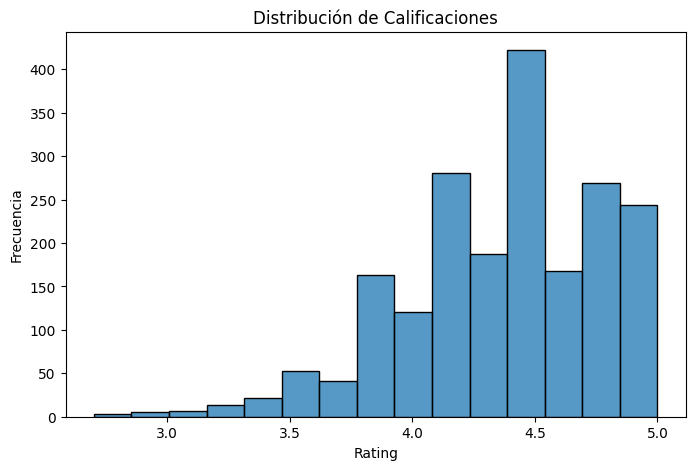

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["customer_rating"], bins=15)
plt.title("Distribución de Calificaciones")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

Se analiza que las **mayoria de las calificaciones se encuentran en el rango de 4 a 5.**  No es la mayoria pero existen valores bajos.  Vamos a analizar si esos valores (bajos) están relacionados con el tiempo de entrega de los productos.

In [13]:
df.groupby("low_rating")["delivery_time_days"].mean()

,delivery_time_days
low_rating,
0,4.078605
1,4.892857


Se visualiza que los clientes** satisfechos experimentan un tiempo de entrega de 4 días y los no satisfechos de casi 5 días**.  Esto representa una alarma en la satisfacción del cliente.

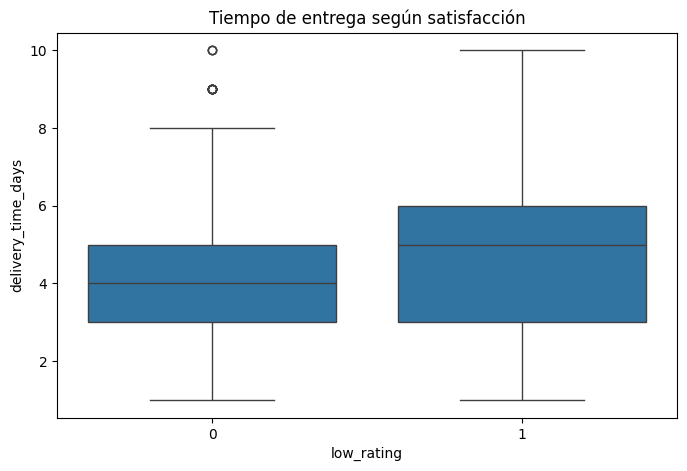

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="low_rating", y="delivery_time_days", data=df)
plt.title("Tiempo de entrega según satisfacción")
plt.show()

Se observan casos aislados en los que la demora fue mayor a la habitual sin que ello implicara una baja calificación. Sin embargo, en promedio los pedidos con baja satisfacción presentan mayor tiempo de entrega. Esto sugiere que el tiempo de entrega podría influir en la experiencia del cliente, aunque no sería el único factor determinante.

**Hallazgo proveedor C**

In [15]:
df.groupby("dtf_supplier")["low_rating"].mean().sort_values(ascending=False)

,low_rating
dtf_supplier,
Proveedor C,0.228029
Proveedor B,0.134561
Proveedor A,0.134021


In [16]:
df["dtf_supplier"].value_counts()

,count
dtf_supplier,
Proveedor A,873
Proveedor B,706
Proveedor C,421


Se observa que el proveedor C tiene una tasa de insatisfacción de un 22,8%.  Una tasa superior a los otros dos proveedores. El proveedor C con 421 registros y una tasa de insatisfacción del 22,8% representa un aproximado de 96 pedidos con baja satisfacción.  Esto sugiere una posible problemática operativa asociada a dicho proveedor.

In [17]:
#Distribución de defectos por proveedor

pd.crosstab(df["dtf_supplier"], df["defect_type"], normalize="index")

defect_type,Color shift,Deformación,Descascarado,Ninguno,Pegado
dtf_supplier,,,,,
Proveedor A,0.006873,0.020619,0.006873,0.955326,0.010309
Proveedor B,0.009915,0.008499,0.019830,0.947592,0.014164
Proveedor C,0.014252,0.007126,0.011876,0.945368,0.021378


Al analizar la distribución de defectos por proveedor se observa que el Proveedor C presenta una mayor proporción en algunos tipos de defecto, especialmente “Pegado” y “Color shift”. Sin embargo, las diferencias porcentuales no son significativamente elevadas respecto a los otros proveedores. Esto sugiere que, si bien los defectos podrían influir en la baja satisfacción, no parecen ser la única causa que explica la mayor tasa observada en el Proveedor C.

In [18]:
df.groupby("dtf_supplier")["delivery_time_days"].mean()

,delivery_time_days
dtf_supplier,
Proveedor A,3.333333
Proveedor B,4.368272
Proveedor C,5.733967


Al analizar el tiempo promedio de entrega por proveedor se observa que el Proveedor C presenta el mayor tiempo (5,73 días), superando significativamente a los proveedores A (3,33 días) y B (4,37 días). Esta diferencia podría estar influyendo en la mayor tasa de baja satisfacción detectada anteriormente en el Proveedor C.

Si bien los defectos físicos no mostraron diferencias sustanciales, el mayor tiempo de entrega podría estar actuando como un factor determinante en la experiencia negativa del cliente.  

In [19]:
#Analizar el área de impresión que utiliza cada proveedor

df.groupby("dtf_supplier")["dtf_area_cm2"].mean()

,dtf_area_cm2
dtf_supplier,
Proveedor A,244.014891
Proveedor B,240.803116
Proveedor C,235.353919


In [20]:
#Analizar área de impresión por talle
pd.crosstab(df["dtf_supplier"], df["size"], normalize="index")

size,L,M,S,XL,XS,XXL
dtf_supplier,,,,,,
Proveedor A,0.258877,0.292096,0.142039,0.191294,0.029782,0.085911
Proveedor B,0.245042,0.311615,0.143059,0.167139,0.045326,0.087819
Proveedor C,0.287411,0.285036,0.121140,0.168646,0.047506,0.090261


Se analizó el área promedio de impresión por proveedor y, si bien el Proveedor C presenta un valor levemente inferior, la diferencia respecto a los demás proveedores no resulta significativa. Asimismo, al contrastar esta variable con la distribución de talles, no se observa evidencia que indique que el tamaño de impresión esté afectando de manera relevante la satisfacción del cliente.
En cambio, sí se detecta un mayor tiempo promedio de entrega en el Proveedor C, lo cual podría estar influyendo en la experiencia negativa reportada.

In [21]:
#analizar el nivel de satisfacción segmentado por proveedor

df.groupby(["dtf_supplier", "low_rating"])["delivery_time_days"].mean()

dtf_supplier  low_rating
Proveedor A   0             3.261905
              1             3.794872
Proveedor B   0             4.278232
              1             4.947368
Proveedor C   0             5.603077
              1             6.177083
Name: delivery_time_days, dtype: float64

Al analizar el tiempo de entrega segmentado por proveedor y nivel de satisfacción se observa que, en todos los casos, los pedidos con baja calificación presentan aproximadamente medio día adicional de demora respecto a los satisfechos. Sin embargo, el Proveedor C mantiene un tiempo promedio estructuralmente superior incluso cuando la calificación es positiva. Esto sugiere que el mayor riesgo de baja satisfacción asociado al Proveedor C podría estar vinculado a un desempeño logístico más lento en términos generales. Por este motivo, el análisis se enfocará en identificar si existe un riesgo estructural asociado a este proveedor y qué variables lo explican.

**Enriquecimiento con IPC (fuente externa)**

**Creación de variable temporal **

Con el objetivo de incorporar información externa de carácter mensual (por ejemplo, variables macroeconómicas), se transforma la columna order_date a formato datetime y se extrae el período año-mes. Esto permitirá realizar un posterior cruce de datos con series temporales externas.





In [22]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["year_month"] = df["order_date"].dt.to_period("M")
df[["order_date", "year_month"]].head()

,order_date,year_month
0,2024-01-02,2024-01
1,2024-01-03,2024-01
2,2024-01-03,2024-01
3,2024-01-03,2024-01
4,2024-01-04,2024-01


**Incorporación de datos externos desde archivo local**

Se utiliza una serie mensual del Índice de Precios al Consumidor (IPC), obtenida previamente desde una API pública y almacenada localmente.
Esta variable permitirá incorporar contexto macroeconómico al análisis, vinculando cada pedido con la variación mensual de precios correspondiente.

In [26]:
ipc = pd.read_csv("/content/datos.gob.arvariación mensual %.csv")

ipc.head()

,indice_tiempo,ipc_ng_nacional_tasa_variacion_mensual
0,2017-01-01,0.015859
1,2017-02-01,0.020672
2,2017-03-01,0.023742
3,2017-04-01,0.026558
4,2017-05-01,0.014348


**Validación de integración**


Se prepara la serie mensual de IPC (tasa de variación mensual) y se integra al dataset de pedidos utilizando la clave year_month, de modo que cada pedido quede asociado al contexto inflacionario del mes correspondiente.

Index(['indice_tiempo', 'ipc_ng_nacional_tasa_variacion_mensual'], dtype='object')

In [28]:
#conversión de fechas y creación de year_month
ipc["indice_tiempo"] = pd.to_datetime(ipc["indice_tiempo"])
ipc["year_month"] = ipc["indice_tiempo"].dt.to_period("M")

#selección de columnas y renombre
ipc_m = ipc[["year_month", "ipc_ng_nacional_tasa_variacion_mensual"]].copy()
ipc_m = ipc_m.rename(columns={"ipc_ng_nacional_tasa_variacion_mensual": "ipc_variacion_mensual_pct"})

#uniòn de tablas
df = df.merge(ipc_m, on="year_month", how="left")

df[["order_date", "year_month", "ipc_variacion_mensual_pct"]].head()

,order_date,year_month,ipc_variacion_mensual_pct
0,2024-01-02,2024-01,0.206142
1,2024-01-03,2024-01,0.206142
2,2024-01-03,2024-01,0.206142
3,2024-01-03,2024-01,0.206142
4,2024-01-04,2024-01,0.206142


La serie viene expresada como proporción (0.20 = 20%)

In [29]:
df["ipc_variacion_mensual_pct"].isna().sum()

np.int64(429)

Se verifica que hay 429 pedidos sin datos.

In [30]:
#verificar si se estan analizando los mismos periodos

df["year_month"].min(), df["year_month"].max()
ipc_m["year_month"].min(), ipc_m["year_month"].max()

(Period('2017-01', 'M'), Period('2025-04', 'M'))

Se verifica que se están analizando los mismos periodos.

In [32]:
df["year_month"].dtype

period[M]

In [33]:
ipc_m["year_month"].dtype

period[M]

Se verifica dtype que ambos sean Period M

In [34]:
ipc_m["year_month"].duplicated().sum()

np.int64(0)

In [35]:
missing_months = sorted(set(df.loc[df["ipc_variacion_mensual_pct"].isna(), "year_month"]))
missing_months[:20], len(missing_months)

([Period('2025-05', 'M'),
  Period('2025-06', 'M'),
  Period('2025-07', 'M'),
  Period('2025-08', 'M'),
  Period('2025-09', 'M')],
 5)

In [36]:
ipc_m_months = set(ipc_m["year_month"])
sum([m in ipc_m_months for m in missing_months]), missing_months[:10]

(0,
 [Period('2025-05', 'M'),
  Period('2025-06', 'M'),
  Period('2025-07', 'M'),
  Period('2025-08', 'M'),
  Period('2025-09', 'M')])

Se verifica que los 429 pedidos faltantes se debe a 5 meses faltantes 2025-05 a 2025-09 con respcto al ipc_m.  

**Restricción al período común (df_ipc)**


Dado que la serie de IPC no contiene información para los meses posteriores a 2025-04, se restringe el análisis que incorpora esta variable al período cubierto por ambas fuentes.
De esta manera se evita la imputación de datos externos y se mantiene consistencia metodológica.

In [39]:
# Identificar el último mes disponible en la serie IPC
max_ipc_month = ipc_m["year_month"].max()

# Filtrar el dataset principal
df_ipc = df[df["year_month"] <= max_ipc_month].copy()

# Verificar que ya no haya valores faltantes
df_ipc["ipc_variacion_mensual_pct"].isna().sum(), df_ipc.shape

(np.int64(0), (1571, 38))

Se verifica que que no hay filas faltantes, que se perdieron los 429 registros de los meses sin IPC. Quedaron 38 columnas.


**EDA breve del IPC vs low_rating**


In [40]:
df_ipc.groupby("low_rating")["ipc_variacion_mensual_pct"].mean()

,ipc_variacion_mensual_pct
low_rating,
0,0.059625
1,0.056539


IPC cumple como contexto y requisito de API, pero no aporta señal fuerte para explicar baja satisfacción

**Modelado – Regresión Logística**

Con el objetivo de cuantificar el riesgo de baja satisfacción y evaluar el impacto relativo de las distintas variables, se entrena un modelo de regresión logística.

Este modelo permite estimar la probabilidad de que un pedido resulte en baja calificación considerando simultáneamente variables logísticas, comerciales y de contexto.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Dataset para modelado (con IPC y sin NaN)
data = df_ipc.copy()

target = "low_rating"

features = [
    "delivery_time_days",
    "dtf_supplier",
    "discount_pct",
    "shipping_method",
    "channel",
    "size",
    "repeat_customer",
    "ipc_variacion_mensual_pct"
]

X = data[features]
y = data[target]

cat_cols = ["dtf_supplier", "shipping_method", "channel", "size"]
num_cols = ["delivery_time_days", "discount_pct", "repeat_customer", "ipc_variacion_mensual_pct"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

model = LogisticRegression(max_iter=2000)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, proba))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

ROC AUC: 0.5506616630456252
[[330   2]
 [ 60   1]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       332
           1       0.33      0.02      0.03        61

    accuracy                           0.84       393
   macro avg       0.59      0.51      0.47       393
weighted avg       0.77      0.84      0.78       393



In [42]:
pred_proba_all = clf.predict_proba(X)[:, 1]
tmp = data[["dtf_supplier"]].copy()
tmp["p_low_rating"] = pred_proba_all
tmp.groupby("dtf_supplier")["p_low_rating"].mean().sort_values(ascending=False)

,p_low_rating
dtf_supplier,
Proveedor C,0.253235
Proveedor B,0.129545
Proveedor A,0.127812


**Evaluación del modelo**

Probabilidad estimada de baja satisfacción por proveedor

Al analizar la probabilidad promedio estimada por el modelo para cada proveedor, se observa que el Proveedor C presenta un riesgo cercano al 25%, mientras que los proveedores A y B se ubican en torno al 13%.

Esto indica que, incluso al controlar por otras variables como tiempo de entrega, descuento y canal, el Proveedor C mantiene un mayor riesgo relativo de generar experiencias negativas.

El modelo tiene bajo poder predictivo individual, pero confirma una diferencia estructural asociada al proveedor C.

Corrección del modelo

Ya que la baja satisfacción es por debajo del 15% vamos a evitar que tome esos deatos como 0

**Ajuste del modelo**

In [43]:
model = LogisticRegression(max_iter=2000, class_weight="balanced")

In [44]:
clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", model)
])

clf.fit(X_train, y_train)

pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, proba))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

ROC AUC: 0.5415267627888604
[[204 128]
 [ 33  28]]
              precision    recall  f1-score   support

           0       0.86      0.61      0.72       332
           1       0.18      0.46      0.26        61

    accuracy                           0.59       393
   macro avg       0.52      0.54      0.49       393
weighted avg       0.76      0.59      0.65       393



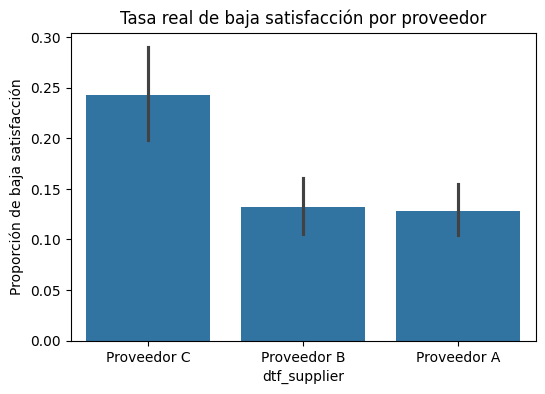

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x="dtf_supplier", y="low_rating", data=df_ipc)
plt.title("Tasa real de baja satisfacción por proveedor")
plt.ylabel("Proporción de baja satisfacción")
plt.show()

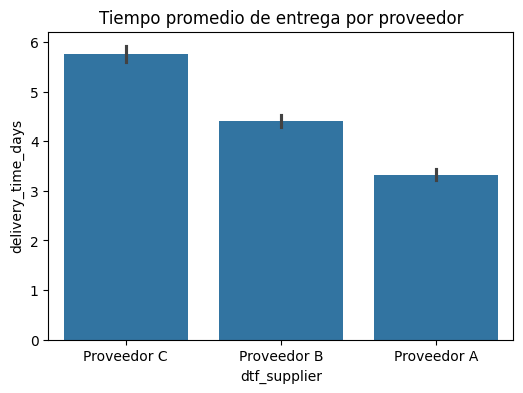

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x="dtf_supplier", y="delivery_time_days", data=df_ipc)
plt.title("Tiempo promedio de entrega por proveedor")
plt.show()

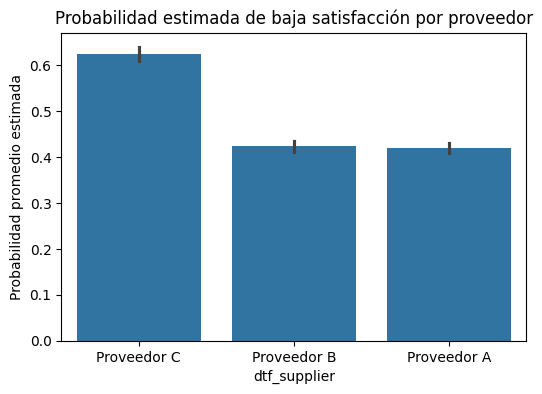

In [47]:
pred_proba_all = clf.predict_proba(X)[:, 1]
tmp = df_ipc[["dtf_supplier"]].copy()
tmp["p_low_rating"] = pred_proba_all

plt.figure(figsize=(6,4))
sns.barplot(x="dtf_supplier", y="p_low_rating", data=tmp)
plt.title("Probabilidad estimada de baja satisfacción por proveedor")
plt.ylabel("Probabilidad promedio estimada")
plt.show()

Si bien el modelo no presenta alta capacidad predictiva individual (AUC cercano a 0.55), el análisis de probabilidades promedio confirma que el Proveedor C mantiene mayor riesgo relativo incluso al controlar por variables logísticas y comerciales. Esto sugiere la existencia de factores estructurales no capturados completamente por las variables disponibles.